# Decision Tree Specialty Coffee Case Study 

# The Scenario


RR Diner Coffee sells two types of thing:
- specialty coffee beans, in bulk (by the kilogram only) 
- coffee equipment and merchandise (grinders, brewing equipment, mugs, books, t-shirts).

RR Diner Coffee has three stores, two in Europe and one in the USA. The flagshap store is in the USA, and everything is quality assessed there, before being shipped out. Customers further away from the USA flagship store have higher shipping charges. 

You've been taken on at RR Diner Coffee because the company are turning towards using data science and machine learning to systematically make decisions about which coffee farmers they should strike deals with. 

RR Diner Coffee typically buys coffee from farmers, processes it on site, brings it back to the USA, roasts it, packages it, markets it, and ships it (only in bulk, and after quality assurance) to customers internationally. These customers all own coffee shops in major cities like New York, Paris, London, Hong Kong, Tokyo, and Berlin. 

Now, RR Diner Coffee has a decision about whether to strike a deal with a legendary coffee farm (known as the **Hidden Farm**) in rural China: there are rumours their coffee tastes of lychee and dark chocolate, while also being as sweet as apple juice. 

It's a risky decision, as the deal will be expensive, and the coffee might not be bought by customers. The stakes are high: times are tough, stocks are low, farmers are reverting to old deals with the larger enterprises and the publicity of selling *Hidden Farm* coffee could save the RR Diner Coffee business. 

Objective is ***to build a decision tree to predict how many units of the Hidden Farm Chinese coffee will be purchased by RR Diner Coffee's most loyal customers.*** 

To this end, you and your team have conducted a survey of 710 of the most loyal RR Diner Coffee customers, collecting data on the customers':
- age
- gender 
- salary 
- whether they have bought at least one RR Diner Coffee product online
- their distance from the flagship store in the USA (standardized to a number between 0 and 11) 
- how much they spent on RR Diner Coffee products on the week of the survey 
- how much they spent on RR Diner Coffee products in the month preeding the survey
- the number of RR Diner coffee bean shipments each customer has ordered over the preceding year. 

You also asked each customer participating in the survey whether they would buy the Hidden Farm coffee, and some (but not all) of the customers gave responses to that question. 

You sit back and think: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. There's some doubt in your mind about whether 70% is a reasonable threshold, but it'll do for the moment. 

To solve the problem, then, you will build a decision tree to implement a classification solution. 


-------------------------------

**1. Sourcing and loading** 
- Import packages
- Load data
- Explore the data

 
**2. Cleaning, transforming and visualizing**
- Cleaning the data
- Train/test split
  
  
**3. Modelling** 
- Model 1: Entropy model - no max_depth
- Model 2: Gini impurity model - no max_depth
- Model 3: Entropy model - max depth 3
- Model 4: Gini impurity model - max depth 3


**4. Evaluating and concluding** 
- How many customers will buy Hidden Farm coffee?
- Decision

**5. Random Forest** 
- Import necessary modules
- Model
- Revise conclusion
    

#Sourcing and loading, Import Packages

In [43]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image

In [44]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install pydotplus 

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [47]:
import graphviz

In [48]:
import pydotplus

## Load data 

In [49]:
# Read in the data to a variable called coffeeData
coffeeData = pd.read_csv("data/RRDinerCoffeeData.csv")

## Explore the data

In [50]:
# Call head() on your data 
coffeeData.head(8)

,Age,Gender,num_coffeeBags_per_year,spent_week,spent_month,SlrAY,Distance,Online,Decision
0,36,Female,0,24,73,42789,0.003168,0,1.0
1,24,Male,0,44,164,74035,0.520906,0,NaN
2,24,Male,0,39,119,30563,0.916005,1,1.0
3,20,Male,0,30,107,13166,0.932098,1,NaN
4,24,Female,0,20,36,14244,0.965881,0,1.0
5,20,female,0,23,28,14293,1.036346,1,1.0
6,34,Female,0,55,202,91035,1.134851,0,1.0
7,24,Female,0,20,34,17425,1.193188,0,NaN


In [51]:
# Call .shape on your data
coffeeData.shape

(702, 9)

In [52]:
# Call info() on your data
coffeeData.info

<bound method DataFrame.info of      Age  Gender  num_coffeeBags_per_year  spent_week  spent_month  SlrAY  \
0     36  Female                        0          24           73  42789   
1     24    Male                        0          44          164  74035   
2     24    Male                        0          39          119  30563   
3     20    Male                        0          30          107  13166   
4     24  Female                        0          20           36  14244   
..   ...     ...                      ...         ...          ...    ...   
697   45  Female                        5          61          201  80260   
698   54    Male                        5          44          116  44077   
699   63    Male                        5          33          117  43081   
700   20  Female                        5          41          159  12522   
701   90    Male                        5          39          170  15098   

      Distance  Online  Decision  
0     0.

In [53]:
# Call describe() on your data with the parameter include = 'all' to get the relevant summary statistics for your data 
coffeeData.describe

<bound method NDFrame.describe of      Age  Gender  num_coffeeBags_per_year  spent_week  spent_month  SlrAY  \
0     36  Female                        0          24           73  42789   
1     24    Male                        0          44          164  74035   
2     24    Male                        0          39          119  30563   
3     20    Male                        0          30          107  13166   
4     24  Female                        0          20           36  14244   
..   ...     ...                      ...         ...          ...    ...   
697   45  Female                        5          61          201  80260   
698   54    Male                        5          44          116  44077   
699   63    Male                        5          33          117  43081   
700   20  Female                        5          41          159  12522   
701   90    Male                        5          39          170  15098   

      Distance  Online  Decision  
0     

# 2. Cleaning, transforming and visualizing
## Cleaning the data

In [54]:
# Call .columns on your data to check out the names of our data's columns 
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week', 'spent_month',
       'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [55]:
# Using .rename(), make the relevant name changes to spent_week and spent_per_week.
# Remember: you can either do a reassignment, or use inplace=True. Both will change the value of coffeeData
coffeeData.rename(columns = {"spent_month":"spent_last_month", "spent_week":"spent_last_week", "SlrAY":"Salary"},
            inplace = True)

In [56]:
# Check out the column names
coffeeData.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'Salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [57]:
# Let's have a closer look at the gender column. Its values need cleaning.
# Call describe() on the gender column 
coffeeData["Gender"].describe()

count      702
unique       9
top       Male
freq       355
Name: Gender, dtype: object

In [58]:
# Call unique() on the gender column to see its unique values 
coffeeData["Gender"].unique()

array(['Female', 'Male', 'female', 'F', 'f ', 'FEMALE', 'MALE', 'male',
       'M'], dtype=object)

In [59]:
# Use the function .replace() on the column "gender"; replace all alternate values with 'Female'
coffeeData["Gender"] = coffeeData["Gender"].replace(["female", "f ", "FEMALE", "F"], "Female")

In [60]:
# Let's check the unique values of the column "gender"
coffeeData["Gender"].unique()

array(['Female', 'Male', 'MALE', 'male', 'M'], dtype=object)

In [61]:
# Use the function .replace() on the column "gender"; replace all alternate values with "Male"
coffeeData["Gender"] = coffeeData["Gender"].replace(["MALE", "male", "M"], "Male")

In [62]:
# Let's check the unique values of the column "gender"
coffeeData["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [63]:
# Check out the unique values of the column 'Decision':
coffeeData["Decision"].unique()

array([ 1., nan,  0.])

In [64]:
# Call replace() on the Decision column to replace 1.0 and 0.0 by 'Yes' and 'No'
coffeeData["Decision"] = coffeeData["Decision"].replace(1.0, "YES")
coffeeData["Decision"] = coffeeData["Decision"].replace(0.0, "NO")
coffeeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      702 non-null    int64  
 1   Gender                   702 non-null    object 
 2   num_coffeeBags_per_year  702 non-null    int64  
 3   spent_last_week          702 non-null    int64  
 4   spent_last_month         702 non-null    int64  
 5   Salary                   702 non-null    int64  
 6   Distance                 702 non-null    float64
 7   Online                   702 non-null    int64  
 8   Decision                 474 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 49.5+ KB


In [65]:
# Check that our replacing those values with 'YES' and 'NO' worked, with unique()
coffeeData["Decision"].unique()

array(['YES', nan, 'NO'], dtype=object)

## Train/test split


### Drop all null values within the `Decision` column, and save the result as NoPrediction

In [66]:
# NoPrediction will contain all known values for the decision
# Call dropna() on coffeeData, and store the result in a variable NOPrediction 
# Call describe() on the Decision column of NoPrediction after calling dropna() on coffeeData
NOPrediction = coffeeData.dropna() 
NOPrediction["Decision"].describe()

count     474
unique      2
top       YES
freq      303
Name: Decision, dtype: object

### Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis

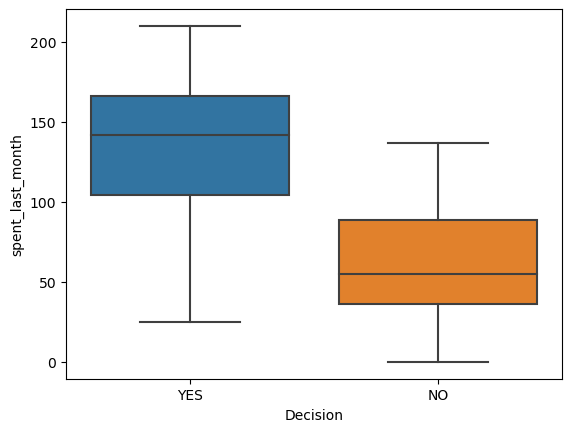

In [67]:
# Exploring our new NOPrediction dataset
# Call boxplot() on our Seaborn object sns, and plug y="spent_last_month", x= "Decision", data=NOPrediction
# Don't forget to call plt.slow() after that 
sns.boxplot(y="spent_last_month", x= "Decision", data=NOPrediction)
plt.show()

<Axes: xlabel='Distance', ylabel='spent_last_month'>

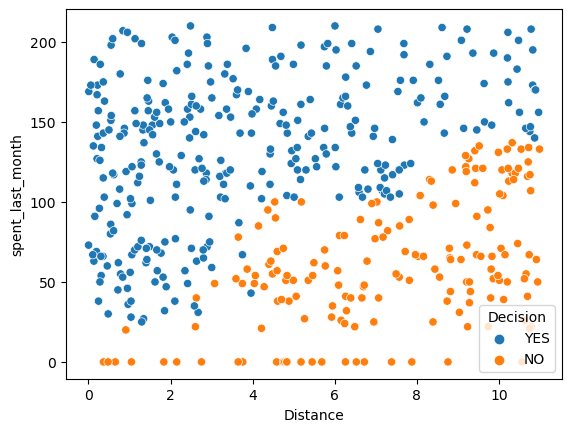

In [68]:
# Call scatterplot() on our Seaborn object sns, and plug in y="spent_last_month", x= "distance", hue = "Decision", data =NOPrediction.
sns.scatterplot(y="spent_last_month", x= "Distance", hue = "Decision", data =NOPrediction)

### 3. Get the subset of coffeeData with null values in the Decision column, and save that subset as Prediction

In [69]:
# Get just those rows whose value for the Decision column is null. There are lots of ways to do this.
# One way is to subset on pd.isnull(data['Decision']). Use square brackets, and plug that in as parameter.
# Store the result in a variable called Prediction 
# Call a head() on the result to see it's worked out alright 
Prediction = coffeeData[pd.isnull(coffeeData["Decision"])]
Prediction.head()

,Age,Gender,num_coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online,Decision
1,24,Male,0,44,164,74035,0.520906,0,NaN
3,20,Male,0,30,107,13166,0.932098,1,NaN
7,24,Female,0,20,34,17425,1.193188,0,NaN
11,24,Female,0,40,153,84803,1.655096,1,NaN
12,21,Female,0,38,122,42338,1.714179,1,NaN


In [70]:
# Call describe() on Prediction
Prediction.describe()

,Age,num_coffeeBags_per_year,spent_last_week,spent_last_month,Salary,Distance,Online
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,31.802632,2.960526,33.394737,110.407895,41923.741228,3.428836,0.570175
std,14.302293,1.585514,15.697930,53.786536,27406.768360,2.153102,0.496140
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.010048,0.000000
25%,22.000000,2.000000,25.750000,65.000000,15911.500000,1.699408,0.000000
50%,25.000000,3.000000,37.000000,113.500000,40987.500000,3.208673,1.000000
75%,39.000000,4.000000,44.000000,151.250000,58537.000000,5.261184,1.000000
max,67.000000,5.000000,62.000000,210.000000,182058.000000,10.871566,1.000000


###  Divide the NOPrediction subset into X and y

In [71]:
# First of all, let's check the names of the columns of NOPrediction
NOPrediction.columns

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'Salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [72]:
# Let's do our feature selection.
# Make a variable called 'features', and a list containing the strings of every column except "Decision"; that is:
# ["age", "gender", "num_coffeeBags_per_year", "spent_last_week", "spent_last_month", "Salary", "Distance", "Online"]
features = ["Age", "Gender", "num_coffeeBags_per_year", "spent_last_week", "spent_last_month",
       "Salary", "Distance", "Online"]


# Make an explanatory variable called X, and assign it: NoPrediction[features]
X = NOPrediction[features]

# Make a dependent variable called y, and assign it: NoPrediction.Decision
y = NOPrediction.Decision

### Create dummy variables to deal with categorical inputs

In [73]:
# One-hot encoding all features in training set.
# Call get_dummies() on our Pandas objet pd, and pass X to it. Reassign the result back to X. 
#X = pd.get_dummies(X)

### Further divide those subsets into train and test subsets for X and y respectively: X_train, X_test, y_train, y_test

In [74]:
# Call train_test_split on X, y, test_size = 0.25, and random_state = 246
# Make new variables called X_train, X_test, y_train, and y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 246)


In [75]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Modelling


## Model 1: Entropy model - no max_depth


In [76]:
# Declare a variable called entr_model, and assign it: tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)

# Call fit() on entr_model, and pass in X_train and y_train, in that order 
entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Assign y_pred the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

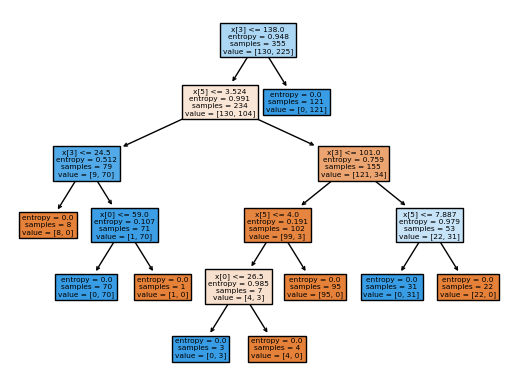

In [77]:
# Now we want to visualize the tree
_ = tree.plot_tree(entr_model, filled=True)

In [80]:
# Now we want to visualize the tree
#dot_data = StringIO()

# We can do so with export_graphviz
#tree.export_graphviz(entr_model, out_file=dot_data,  
                #filled=True, rounded=True,
                #special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 

# Alternatively for class_names use entr_model.classes_
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())
#Image(graph.create_png())
#graph.write_png('graph.png')

## Model 1: Entropy model - no max_depth: Interpretation and evaluation

In [81]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy - no max depth
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score for "Yes" 0.9873417721518988
Precision score for "No" 1.0
Recall score for "Yes" 1.0
Recall score for "No" 0.975609756097561


## Model 2: Gini impurity model - no max_depth 

In [82]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state = 1234)

# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train, y_train)

# Call predict() on the gini_model as you did with the entr_model 
y_pred = gini_model.predict(X_test)

# Turn y_pred into a series, as before
y_pred = pd.Series(y_pred)

# Check out gini_model
gini_model

DecisionTreeClassifier(random_state=1234)

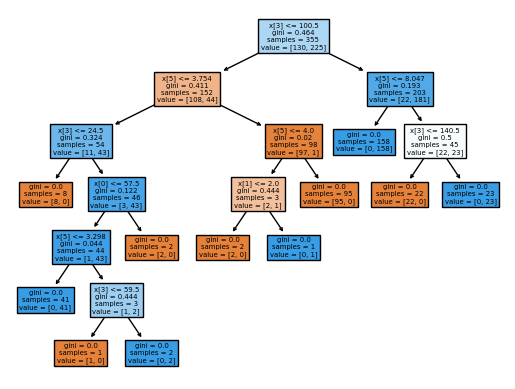

In [84]:
_2 = tree.plot_tree(gini_model, filled=True)

In [85]:
# As before, but make the model name gini_model
#dot_data = StringIO()
#tree.export_graphviz(gini_model , out_file=dot_data,  
                #filled=True, rounded=True,
                #special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

# Alternatively for class_names use gini_model.classes_
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [96]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Gini impurity model
Accuracy: 0.9831932773109243
Balanced accuracy: 0.9813946216385241
Precision score 0.9871794871794872
Recall score 0.975609756097561


## Model 3: Entropy model - max depth 3

In [97]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
entr_model2 = tree.DecisionTreeClassifier(criterion='entropy', random_state=1234, max_depth=3)

entr_model2.fit(X_train, y_train)
y_pred = entr_model2.predict(X_test)

y_pred = pd.Series(y_pred)

entr_model2

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234)

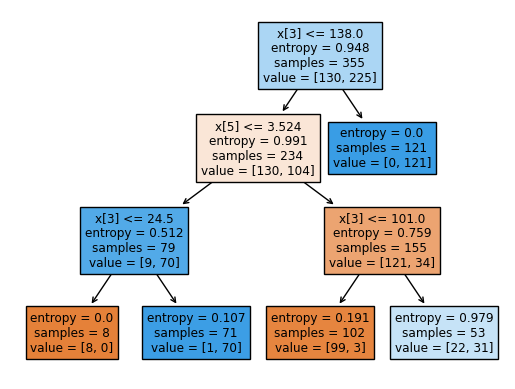

In [98]:
_3 = tree.plot_tree(entr_model2, filled=True)

In [99]:
# As before, we need to visualize the tree to grasp its nature
#dot_data = StringIO()
#tree.export_graphviz(entr_model2, out_file=dot_data,  
                #filled=True, rounded=True,
                #special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

# Alternatively for class_names use entr_model2.classes_
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [100]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy model max depth 3
Accuracy: 0.907563025210084
Balanced accuracy: 0.8658536585365854
Precision score for "Yes" 0.8764044943820225
Recall score for "No" 0.7317073170731707


## Model 4: Gini impurity  model - max depth 3
 

In [102]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion ='gini', random_state=1234, max_depth=3)

# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train, y_train)

y_pred = gini_model2.predict(X_test)
y_pred = pd.Series(y_pred)

gini_model2

DecisionTreeClassifier(max_depth=3, random_state=1234)

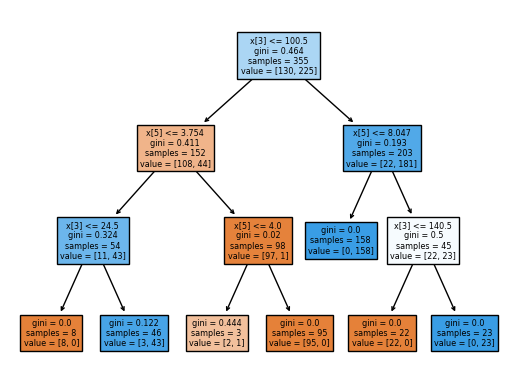

In [103]:
_3 = tree.plot_tree(gini_model2, filled=True)

In [104]:
#dot_data = StringIO()
#tree.export_graphviz(gini_model2, out_file=dot_data,  
                #filled=True, rounded=True,
                #special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])

# Alternatively for class_names use gini_model2.classes_
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [105]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Gini impurity  model - max depth 3
Accuracy: 0.9747899159663865
Balanced accuracy: 0.9691994996873046
Precision score 0.9746835443037974
Recall score 0.9512195121951219


# Evaluating and concluding

In [108]:
# Call value_counts() on the 'Decision' column of the original coffeeData
coffeeData['Decision'].value_counts()

Decision
YES    303
NO     171
Name: count, dtype: int64

In [109]:
# Feature selection
# Make a variable called feature_cols, and assign it a list containing all the column names except 'Decision'
feature_cols = [column for column in coffeeData.columns if column != 'Decision']

# Make a variable called new_X, and assign it the subset of Prediction, containing just the feature_cols 
new_X = Prediction[feature_cols]

In [ ]:
# Feature selection
# Make a variable called feature_cols, and assign it a list containing all the column names except 'Decision'
feauture_cols = ["Age", "Gender", "num_coffeeBags_per_year", "spent_last_week", "spent_last_month",
       "Salary", "Distance", "Online"]

# Make a variable called new_X, and assign it the subset of Prediction, containing just the feature_cols 
new_X = Prediction[feauture_cols]

In [110]:
# Call get_dummies() on the Pandas object pd, with new_X plugged in, to one-hot encode all features in the training set
new_X = pd.get_dummies(new_X)

# Make a variable called potential_buyers, and assign it the result of calling predict() on a model of your choice; 
# don't forget to pass new_X to predict()
potential_buyers = gini_model2.predict(new_X)

In [111]:
# Let's get the numbers of YES's and NO's in the potential buyers 
# Call unique() on np, and pass potential_buyers and return_counts=True 
np.unique(potential_buyers, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([ 45, 183], dtype=int64))

The total number of potential buyers is 303 + 183 = 486

In [112]:
# Print the total number of surveyed people 
print("The total number of surveyed people was", coffeeData.Salary.count())

The total number of surveyed people was 702


In [113]:
# Let's calculate the proportion of buyers
486/702

0.6923076923076923

In [114]:
# Print the percentage of people who want to buy the Hidden Farm coffee, by our model 
print("Only ", round((486/702)*100, 2), "% of people want to buy the Hidden Farm coffee." )

Only  69.23 % of people want to buy the Hidden Farm coffee.


### Import necessary modules

In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### Model

In [117]:
# Plug in appropriate max_depth and random_state parameters 
RFModel = RandomForestClassifier(max_depth=3, random_state=1234)

# Model and fit
RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)
print('Random Forest model - max depth 3')
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Random Forest model - max depth 3
Accuracy: 0.9411764705882353
Balanced accuracy: 0.9204190118824265
Precision score 0.927710843373494
Recall score 0.8536585365853658


In [118]:
RF_potential_buyers = RFModel.predict(new_X)
np.unique(RF_potential_buyers, return_counts=True)

(array(['NO', 'YES'], dtype=object), array([ 39, 189], dtype=int64))

In [119]:
buyers = len(RF_potential_buyers[RF_potential_buyers=='YES'])
total = len(RF_potential_buyers)
buyers/total

0.8289473684210527